In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [2]:
dataframe = pd.read_csv(r"DATOS.csv",sep=';',usecols=['LOCALIDAD', 'MODALIDAD', 'FECHA', 'SEXO', 'SATISFACCIÓN', 'RECUPERADO'])
dataframe = dataframe.replace("MASCULINO",0)
dataframe = dataframe.replace("FEMENINO",1)
dataframe = dataframe.replace("COSQUILLEO",0)
dataframe = dataframe.replace("ATRACO",1)
dataframe = dataframe.replace("RAPONAZO",2)
dataframe = dataframe.replace("USAQUÉN",0)
dataframe = dataframe.replace("CHAPINERO",1)
dataframe = dataframe.replace("SANTA FE",2)
dataframe = dataframe.replace("USME",3)
dataframe = dataframe.replace("BOSA",4)
dataframe = dataframe.replace("KENNEDY",5)
dataframe = dataframe.replace("FONTIBON",6)
dataframe = dataframe.replace("SUBA",7)
dataframe = shuffle(dataframe, random_state=0)
dataframe.head(10)

,LOCALIDAD,MODALIDAD,FECHA,SEXO,SATISFACCIÓN,RECUPERADO
18,1,2,9/01/2020,0,1,0
169,7,0,12/03/2020,1,1,0
106,5,1,16/02/2020,0,4,1
92,6,0,11/02/2020,0,4,1
176,4,2,15/03/2020,1,2,0
183,4,0,18/03/2020,0,1,0
5,0,0,3/01/2020,0,2,1
139,7,1,1/03/2020,0,3,0
12,1,0,7/01/2020,1,3,1
160,7,0,9/03/2020,0,5,0


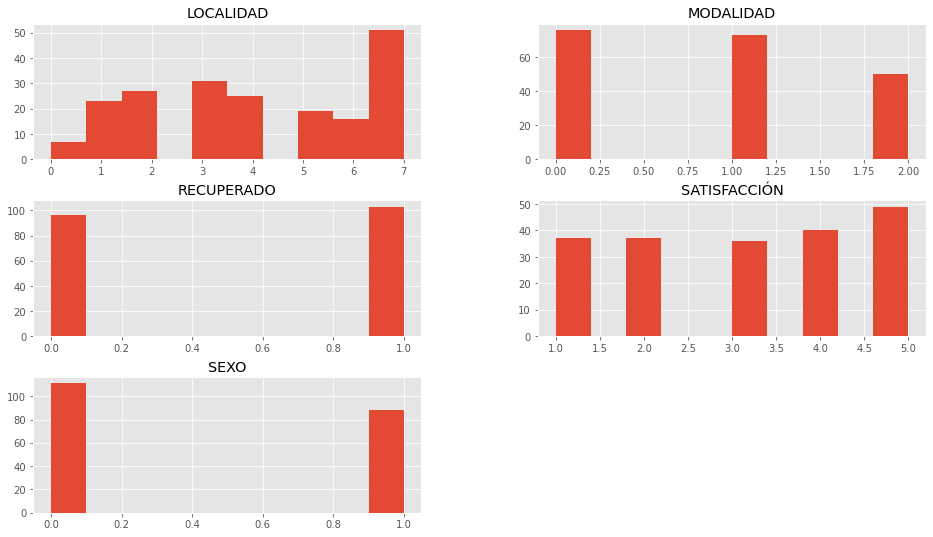

In [3]:
dataframe.hist()
plt.show()

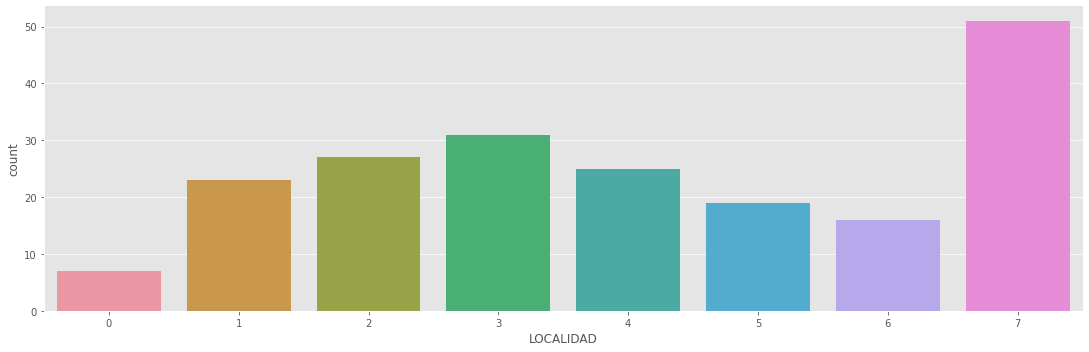

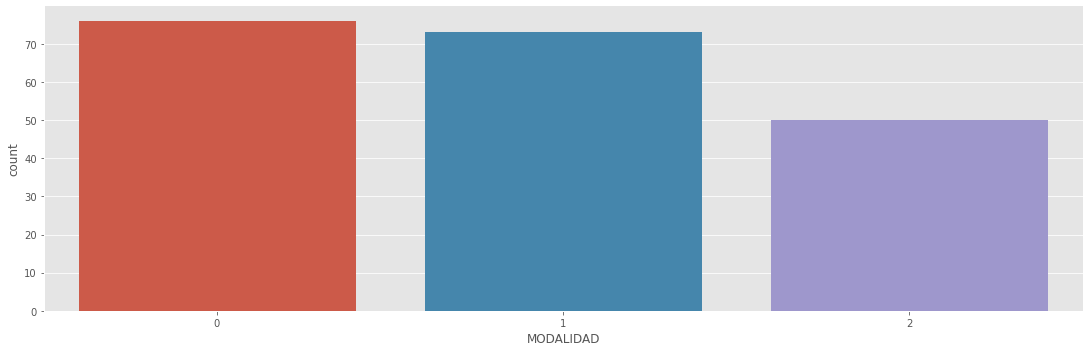

In [5]:
sb.factorplot('LOCALIDAD',data=dataframe,kind="count", aspect=3)
sb.factorplot('MODALIDAD',data=dataframe,kind="count", aspect=3)

In [7]:
Xtotal = dataframe[['LOCALIDAD', 'MODALIDAD']].values
ytotal = dataframe['RECUPERADO'].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
verbose=True

X_train, X_test, y_train, y_test = train_test_split(Xtotal, ytotal,random_state=0)

clf = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 4),activation='relu',random_state=1, max_iter=400,alpha=0.0001,solver ='sgd', learning_rate='adaptive',verbose=verbose)

clf.fit(X_train, y_train)

print(clf.predict_proba(X_test[:1]))

print(clf.predict(X_test[:5, :]))

print(clf.score(X_test, y_test))


Iteration 1, loss = 0.77959013
Iteration 2, loss = 0.77937403
Iteration 3, loss = 0.77906649
Iteration 4, loss = 0.77867732
Iteration 5, loss = 0.77821550
Iteration 6, loss = 0.77768922
Iteration 7, loss = 0.77710591
Iteration 8, loss = 0.77647235
Iteration 9, loss = 0.77579467
Iteration 10, loss = 0.77507841
Iteration 11, loss = 0.77432861
Iteration 12, loss = 0.77354980
Iteration 13, loss = 0.77274610
Iteration 14, loss = 0.77192118
Iteration 15, loss = 0.77107839
Iteration 16, loss = 0.77022071
Iteration 17, loss = 0.76935083
Iteration 18, loss = 0.76847135
Iteration 19, loss = 0.76758431
Iteration 20, loss = 0.76669159
Iteration 21, loss = 0.76579494
Iteration 22, loss = 0.76489591
Iteration 23, loss = 0.76399588
Iteration 24, loss = 0.76309609
Iteration 25, loss = 0.76219763
Iteration 26, loss = 0.76130148
Iteration 27, loss = 0.76040850
Iteration 28, loss = 0.75951946
Iteration 29, loss = 0.75863389
Iteration 30, loss = 0.75775315
Iteration 31, loss = 0.75687803
Iteration 32, los

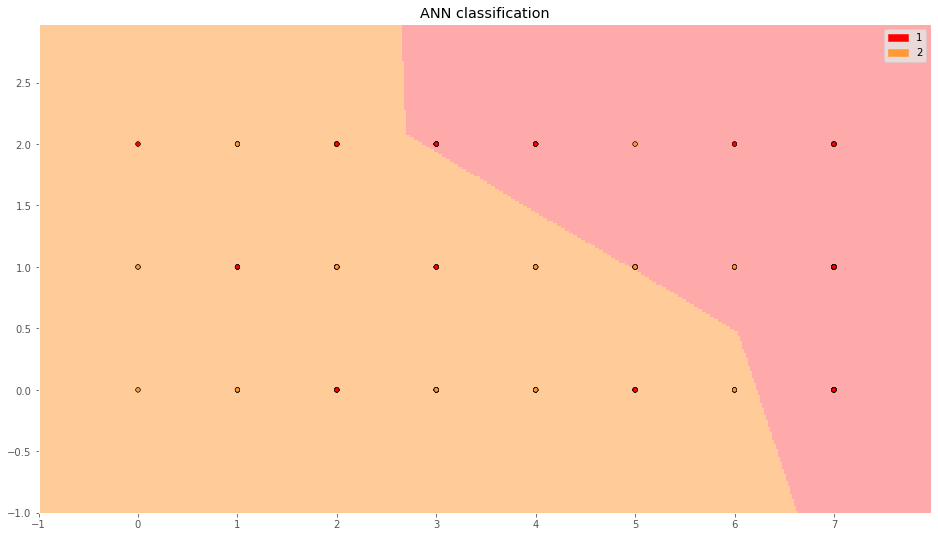

In [9]:
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933'])

clf = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 4),activation='relu',random_state=1, max_iter=200,verbose=False)
clf.fit(Xtotal, ytotal)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xtotal[:, 0].min() - 1, Xtotal[:, 0].max() + 1
y_min, y_max = Xtotal[:, 1].min() - 1, Xtotal[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(Xtotal[:, 0], Xtotal[:, 1], c=ytotal, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
plt.legend(handles=[patch0, patch1])
 
    
plt.title("ANN classification") 
plt.show()